Successfully loaded ../data/241105/systemMatrix/H_matrix_p-5_lmd-100_m-128.npy
Degree Frequency Distribution:
0.0000 - 0.0001: 260744485
0.0001 - 0.0002: 1189728
0.0002 - 0.0003: 645512
0.0003 - 0.0004: 339730
0.0004 - 0.0005: 178221
0.0005 - 0.0006: 93525
0.0006 - 0.0007: 50102
0.0007 - 0.0008: 27692
0.0008 - 0.0009: 16451
0.0009 - 0.0010: 10530


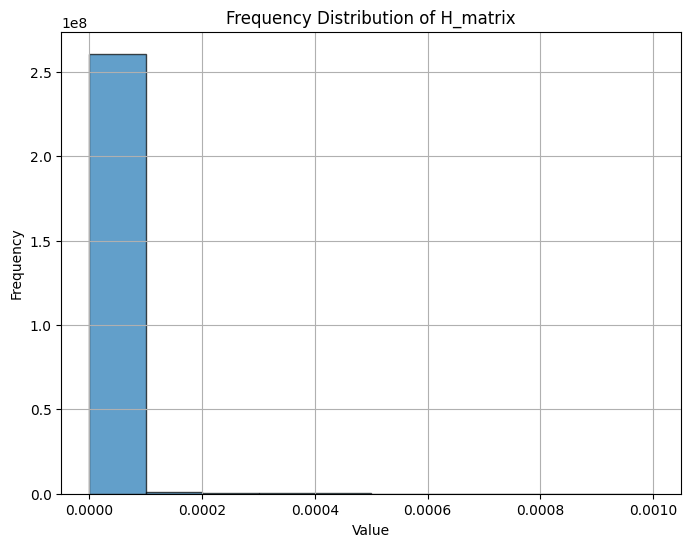

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
m = 128
LAMBDA = 100
RATIO = 0.05
DATA_PATH = "../data"
DIRECTORY = f"{DATA_PATH}/241105"
SETTING = f"p-{int(100 * RATIO)}_lmd-{LAMBDA}_m-{m}"
npy_file = f"{DIRECTORY}/systemMatrix/H_matrix_{SETTING}.npy"

# .npyファイルの読み込み
try:
    matrix = np.load(npy_file)
    print(f"Successfully loaded {npy_file}")
except FileNotFoundError:
    print(f"File not found: {npy_file}")
    exit(1)
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    exit(1)

# データを1次元にフラット化
data = matrix.flatten()

# 度数分布のためのビンの設定
bin_width = 0.0001
bins = np.arange(0, 0.001 + bin_width, bin_width)  # 0.0 から 0.001 まで0.0001刻み

# ヒストグラムの計算
counts, bin_edges = np.histogram(data, bins=bins)

# 度数分布の表示
print("Degree Frequency Distribution:")
for i in range(len(counts)):
    print(f"{bin_edges[i]:.4f} - {bin_edges[i+1]:.4f}: {counts[i]}")

# ヒストグラムのプロット（オプション）
plt.figure(figsize=(8, 6))
plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of H_matrix')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def create_frequency_distribution(npy_file_path, bin_width=0.001, save_csv=False, csv_path='frequency_distribution.csv'):
    """
    指定された .npy ファイルを読み込み、データを範囲ごとに分類し、
    度数分布表を作成して表示します。
    
    Parameters:
    - npy_file_path: str, .npy ファイルのパス
    - bin_width: float, ビンの幅（デフォルトは0.001）
    - save_csv: bool, 度数分布表をCSVファイルとして保存するかどうか（デフォルトはFalse）
    - csv_path: str, 保存するCSVファイルのパス（デフォルトは 'frequency_distribution.csv'）
    """
    # 1. .npy ファイルの読み込み
    try:
        data = np.load(npy_file_path)
    except Exception as e:
        print(f"Error loading .npy file: {e}")
        return

    data = data.flatten()
    if data.ndim != 1:
        print("Error: データは1次元の配列である必要があります。")
        return

    # 2. ビン（範囲）の定義
    min_val = np.min(data)
    max_val = np.max(data)

    # 最初のビンは -inf から 0 まで（<=0）
    # その後は 0 より大きく bin_width 毎のビン
    if max_val > 0:
        num_bins = int(np.ceil(max_val / bin_width))
        bin_edges = np.concatenate(([-np.inf, 0], np.arange(bin_width, (num_bins + 1) * bin_width, bin_width)))
    else:
        # 全てのデータが <=0 の場合
        bin_edges = [-np.inf, 0]

    # 3. 度数分布の計算
    hist, edges = np.histogram(data, bins=bin_edges)

    # 4. ビンのラベル作成
    labels = ['<=0']
    for i in range(1, len(edges)-1):
        lower = edges[i]
        upper = edges[i+1]
        labels.append(f'{lower:.3f}~{upper:.3f}')

    # 度数分布表の作成
    frequency_df = pd.DataFrame({
        '範囲': labels,
        '度数': hist
    })

    # オプションで割合（パーセンテージ）を追加
    frequency_df['割合（%）'] = (frequency_df['度数'] / frequency_df['度数'].sum() * 100).round(2)

    # 5. 度数分布表の表示
    print("\n度数分布表:")
    print(frequency_df.to_string(index=False))

    # オプションでCSVファイルに保存
    if save_csv:
        try:
            frequency_df.to_csv(csv_path, index=False, encoding='utf-8-sig')
            print(f"\n度数分布表を '{csv_path}' に保存しました。")
        except Exception as e:
            print(f"Error saving CSV file: {e}")

if __name__ == "__main__":
    m = 128
    LAMBDA = 100
    RATIO = 0.05
    DATA_PATH = "../data"
    DIRECTORY = DATA_PATH + "/241105"
    SETTING = f"p-{int(100*RATIO)}_lmd-{LAMBDA}_m-{m}"
    npy_file = f"{DIRECTORY}/systemMatrix/H_matrix_{SETTING}.npy"
    create_frequency_distribution(npy_file, bin_width=0.001, save_csv=True, csv_path='frequency_distribution.csv')
